# Decision Trees & Regression Trees
### Author: Beixian Gu

## Table of content
- Decision Trees
- Regression Trees
- Applications on Datasets

## Decision Trees

Decision trees are a type of machine learning algorithm that are used for both classification and regression tasks. A decision tree is a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. It's essentially a tree-like structure in which each internal node represents a feature or attribute, each branch represents a decision rule based on that feature, and each leaf node represents the outcome or prediction.

### Algorithm steps for Decision Trees

1. Start with a dataset and a target variable.
2. Choose the best feature to split the data based on a certain criterion, such as information gain or Gini impurity.
3. Create a node for that feature and split the data into subsets based on the possible values of that feature.
4. Repeat steps 2-3 recursively for each subset until a stopping condition is met, such as a maximum depth or a minimum number of samples per leaf.
5. Assign a prediction value to each leaf node based on the majority class or average value of the target variable in that subset.

Here's an example of a decision tree: 

![Decision Tree Example](https://www.researchgate.net/profile/Avashlin-Moodley-2/publication/311614501/figure/fig2/AS:439104304357377@1481702033140/An-example-of-a-simple-decision-tree.png)

## Introduction to Regression Trees

Regression trees are a type of decision tree that are used for predicting continuous numerical values. They work in a similar way to decision trees, but instead of making binary decisions at each split, they split the data into two or more continuous regions based on a threshold value for a feature.

### Algorithm steps for Regression Trees

1. Start with a dataset and a target variable.
2. Choose the best feature and threshold to split the data based on a certain criterion, such as mean squared error or mean absolute error.
3. Create a node for that feature and threshold and split the data into subsets based on whether each sample falls below or above the threshold.
4. Repeat steps 2-3 recursively for each subset until a stopping condition is met, such as a maximum depth or a minimum number of samples per leaf.
5. Assign a prediction value to each leaf node based on the average value of the target variable in that subset.

Here's an example of a regression tree for predicting the price of a house based on its size and number of bedrooms:

![Regression Tree Example](https://www.researchgate.net/profile/Kristian-Kersting-2/publication/220343808/figure/fig4/AS:277572580593670@1443189868386/An-Example-Relational-Regression-Tree-The-leaves-are-the-regression-values-for-the-query.png)


## Applications on Dataset
- Classification with Decision Tree: fish dataset
- Regression with Regerssion Tree: House price dataset

### Fish dataset

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
fish_data = pd.read_csv("fish.csv")

# Creating features and target variables
features = fish_data.drop("Species", axis=1)
target = fish_data["Species"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [5]:
# Creating the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
tree.fit(X_train, y_train)

# Predicting the species of fish on the test data
y_pred = tree.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 70.83%


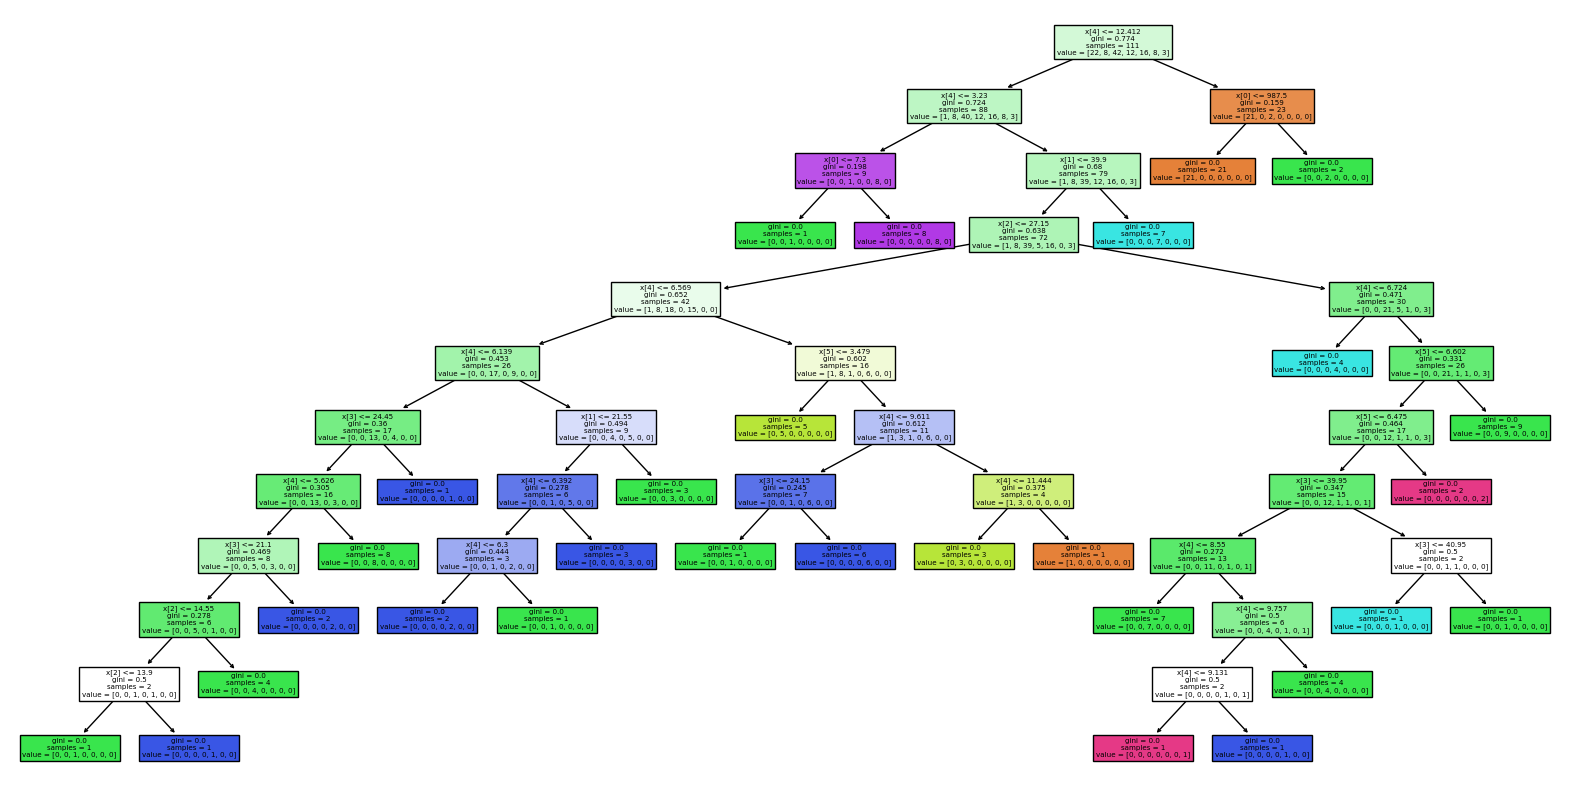

In [6]:
# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True)
plt.show()

### House price

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Reading the data from CSV file
house_data = pd.read_csv("house price.csv")

In [25]:
# Creating features and target variables
features = house_data.drop("price", axis=1)
target = house_data["price"]

# Imputing the missing values with the mean of the non-missing values
imputer = SimpleImputer()
features_imputed = imputer.fit_transform(features)
features = pd.DataFrame(features_imputed, columns=features.columns)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [35]:
# Creating the decision tree regressor
tree = DecisionTreeRegressor(random_state=42)

# Training the regressor on the training data
tree.fit(X_train, y_train)

# Predicting the house prices on the test data
y_pred = tree.predict(X_test)

Mean Absolute Error: 308575.62


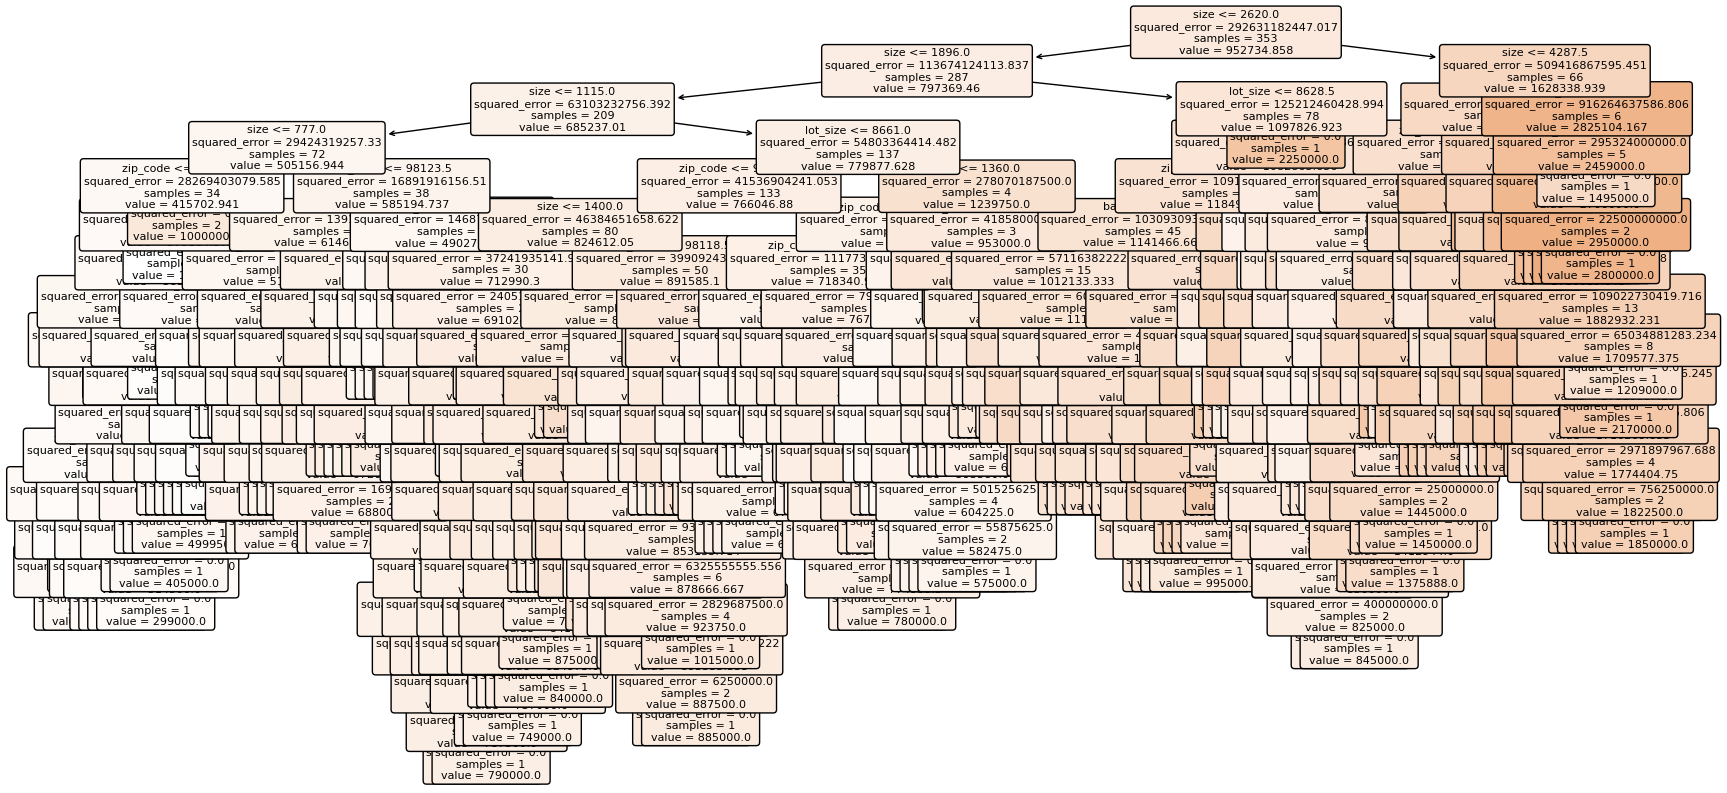

In [30]:
# Calculating the mean absolute error of the regressor
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

# Plotting the regression tree
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names = features.columns,
          class_names = None,
          rounded = True,
          filled = True,
          fontsize = 8)
plt.show()

Mean Squared Error: 525805.38


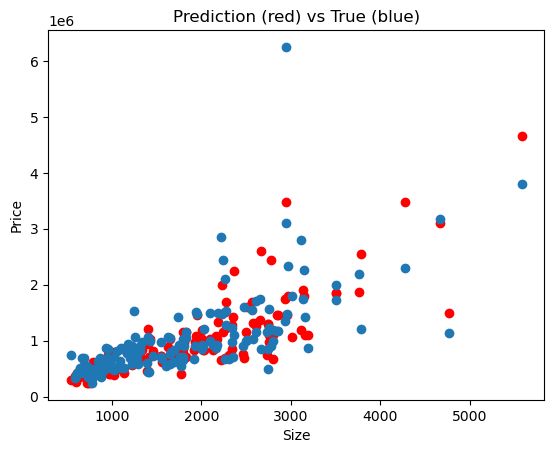

In [37]:
# Calculating the mean squared error of the regressor
mse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error: {:.2f}".format(mse))

# Plotting the predicted prices and the actual prices
plt.scatter(X_test["size"], y_pred, c='red')
plt.scatter(X_test["size"], y_test)
plt.xlabel("Size")
plt.ylabel("Price")
plt.title('Prediction (red) vs True (blue)')
plt.show()